## DS807: Applied machine learning
Christian M. Dahl. cmd@sam.sdu.dk.

## Introduction and support vector machines

Notes: For the purpose of this notebook, AITSL (aka ISLR) refers to An Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani (ISBN 978-1-4614-7137-0) [chapter 9]. The book can be downloaded from here: https://www.statlearning.com/

## Introduction
Welcome to DS807. Briefly, this is the course where you will learn state-of-the-art methods in data science for prediction. And with learn, I refer to *being able to actually apply these algorithms to arbitrary problems*.

## Course overview and description

Briefly, the course consists of two parts: "*Shallow*" and "*deep*" learning.

We start by support vector machines and decision trees. This will include ensembling and boosting, which are general concepts important to many algorithms.

We then move on to deep learning, covering the three most common structures of neural networks (densely feed forward, convolutional, and recurrent), learn to solve regression and classification problems by supervised learning, and extending these concepts to *generative modelling*.

## Structure of the lessons

The lectures will emphasize how to apply the methods. For this reason, we will typically start with some theory, move on to one or more code examples, and then have you solving exercises. We will mix in some smaller quizzes. And there will be some more involved exercises you can solve between lectures.

For exercises I suggest group sizes of 3-4. This way, you can "call me over" when you encounter a problem.

We will code in Python, using *notebooks*. Now, you can choose what you prefer here, but I suggest this setup - especially if you are new to Python. 

## *However...*

This course is new. Everything might not be perfect.

We will likely revise our plans as we go along, if we come to the realization that something might be done better in a different way. For this, your feedback is important. Ultimately, it is about what *works for you*.

## Program

After this lecture, you will:
1. be familiar with support vector machines (SVMs) for classification and regression.
2. be familiar with the basics of Python programming for data science.
3. have applied your knowledge in order to train SVMs for classification (and regression).

## Seperation of two classes

We will start by considering the most simple case of support vector machines (SVMs) - seperating two classes. 

This includes cases such as: telling if a patient is sick, forecasting whether there will be a natural disasters, and predicting which president will be elected.

Extending this to multiclass tasks (such as diagnosing a patient with more than two possible diagnoses) and regression (such as prediction a price) is relatively straightforward once you are familiar with SVMs for seperation of two classes.

## Seperating hyperplanes

<img src="./graphics/seperating-hyperplanes.png" alt="Drawing" style="width: 800px;"/>

Source: "AITSL"

## What is a hyperplane?

<img src="./graphics/Whatisahyperplane.PNG" alt="Drawing" style="width: 800px;"/>

Source: "AITSL"

## Choosing a hyperplane: Maximal margin classifier

Which to choose? We want points to be "far away" from our decision boundary!

<img src="./graphics/maximal-margin-classifier_withmath.png" alt="Drawing" style="width: 800px;"/>

Source: "AITSL"

---
Questions: A. What is a seperating hyperplane? B. What is $y_{i}$?

## Problems

The above looks really good. But it almost never works in practice.

1. Non-seperable data
2. Noisy data

## Non-seperable data

In general, we cannot expect that we can perfectly seperate the data with a hyperplane. As such, we need to "relax" our seperation to allow it to work despite not being perfect.

<img src="./graphics/non-seperable-points.png" alt="Drawing" style="width: 400px;"/>

Source: "AITSL"

## Noisy data

Further, data is often noisy, and a maximal margin classifier is too "sensitive" to this noise.

<img src="./graphics/new-point-maximal-margin-classifier.png" alt="Drawing" style="width: 800px;"/>

Source: "AITSL"

## Support vector (or soft margin) classifiers

For the reasons above, we want to come up with a more "robust" seperating hyperplane.

Idea: Allow some data points to lie within the margin - maybe even on the wrong side of the hyperplane. We *cut some slack* by introducing a parameter, often denoted *C*, that roughly corrosponds to how many (and by how much) points we allow to lie within the margin (hence the *soft* margin). 

This is essentially a regularization parameter that allows us to trade between bias and variance: we can choose a low value for narrow margins, implying low bias but high variance. Or we can choose a high value for wide margins, implying high bias but low variance.

**Note**: Only points on or on wrong side of the margin affect the classifier! These observations are known as the *support vectors*.

## Illustration of *soft* margins

<img src="./graphics/support-vector-classifier_withmath.png" alt="Drawing" style="width: 600px;"/>

Source: "AITSL"

---
Questions: What is $\epsilon_{i}$? How would you interprete $C$?

## Same points - different *slack*

<img src="./graphics/support-vector-classifiers.png" alt="Drawing" style="width: 400px;"/>

Source: "AITSL"

---
Question: Is the choice of $C$ important in terms of the `bias-variance` tradeoff?

## When linearity is not enough

<img src="./graphics/non-linearly-seperable.png" alt="Drawing" style="width: 800px;"/>
Source: "AITSL"

## When linearity is not enough

As the example above illustrates, sometimes a linear classifier is hopeless. However, this is in many cases easy to solve by simply transforming the features.

The intuition is as follows: even if something it not linearly seperable, it might *become* linearly seperable if we transform the features.

*Essentially, SVMs are a way to transform the variables and then find a seperating hyperplane by using the transformed variables*.

A few additional tricks are used as well, but the core idea is to exploit transformed variables.

Let's illustrate it. The code is not important, but it is here so you can recreate it.

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import numpy as np

# Our data. X is (n, 2), i.e. 2 variables. y is (n,).
X, y = make_circles(n_samples=300, noise=0.01)

# Adding a new variable
z = X[:, 0] ** 2 + X[:, 1] ** 2

# Transforming our variables to new ones
radius = np.sqrt(np.square(X[:, 0]) + np.square(X[:, 1]))
theta = np.arctan2(X[:, 0], X[:, 1])

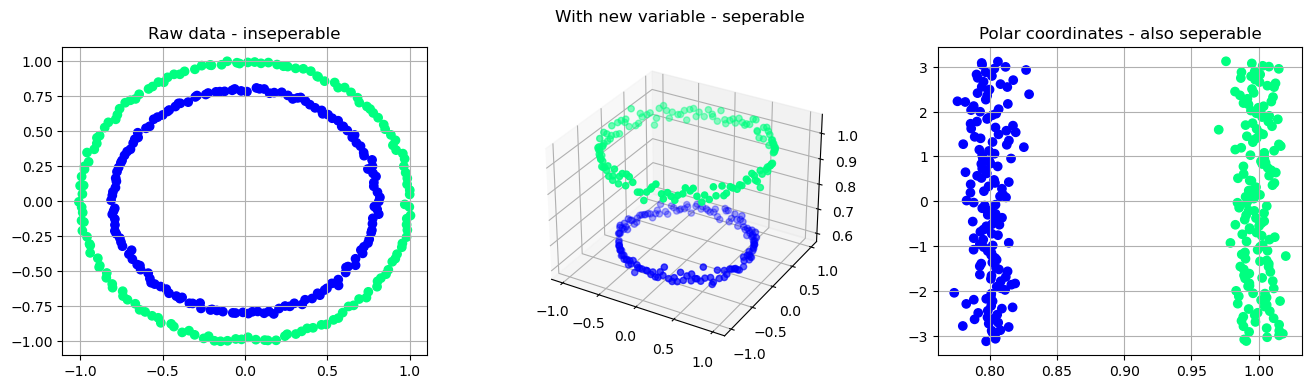

In [2]:
fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("winter_r"))
ax.grid(True)
plt.title('Raw data - inseperable')

ax = fig.add_subplot(1, 3, 2, projection ="3d")
ax.scatter3D(X[:, 0], X[:, 1], z, c=y, cmap=plt.get_cmap("winter_r"))
plt.title('With new variable - seperable \n')

ax = fig.add_subplot(1, 3, 3)
ax.scatter(radius, theta, c=y, cmap=plt.get_cmap("winter_r"))
ax.grid(True)
plt.title('Polar coordinates - also seperable')

plt.show()

## Support vector machines

To sum up: SVMs are a way to seperate data points by a non-linear decision boundary.

That is, we construct new variables and make a seperating hyperplane, using a soft margin (or support vector) classifier.

As mentioned earlier, there are some "tricks". The main "beautiful" thing about SVMs is that they are able to make this seperating hyperplane *without actually constructing the new variables*, using something called **the kernel trick**.

Solving the system of equations that yields the solution to an SVM only involves the inner products of observations. This leads to the kernel trick, which is to exploit this fact to not actually transform the variables but instead use kernels that act *as if you have transformed the variables*.

The three most common kernel functions:

Linear: $K(x_i,x_{i′})=\sum_{j=1}^p x_{ij}x_{i'j}$

Polynomial: $K(x_i,x_{i′})=(1 + \sum_{j=1}^p x_{ij}x_{i'j})^d$

Radial: $K(x_i,x_{i′})=exp(\gamma\sum_{j=1}^p (x_{ij} - x_{i'j})^2)$

And the solution form is then:

$f(x) = \beta_0 + \sum_{i=1}^n \hat{\alpha}_i K(x, x_i)$

Where most $\hat{\alpha}_i$ are equal to 0. Letting S denote the indicies where $\hat{\alpha}_i\neq0$:

$f(x) = \beta_0 + \sum_{i\in S} \hat{\alpha}_i K(x, x_i)$

## Linearly inseparable data - polynomial and radial *kernels*

<img src="./graphics/non-linearly-seperable.png" alt="Drawing" style="width: 400px;"/>
<img src="./graphics/support-vector-machines.png" alt="Drawing" style="width: 400px;"/>
Source: "AITSL"

## Coding an SVM for classification

Now it's time to see SVM in action.

This first example illustrates how we can solve the "circle" problem by using non-linear kernels (as illustrated by our earlier example).

To fit an SVM, we start by [initializing](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) an SVM for classification, using $\texttt{model = svm.SVC(settings)}$.

We then fit it on our data, using $\texttt{model.fit(Xtrain, ytrain)}$.

We can then predict on data using $\texttt{yhat = model.predict(Xtest)}$.

These three steps - initializing, fitting, and predicting - are quite general for the models we will use, both when it comes to shallow and to deep learning.

(800, 2) (200, 2) (800,) (200,)


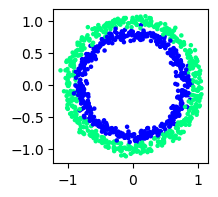

In [26]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from matplotlib import pyplot as plt

# We start with "circle" data, as we saw in the example earlier.
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create a smaller figure
plt.figure(figsize=(2, 2))
# Let us look at the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("winter_r"),s=5)
plt.show()

In [27]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# ... and predicting
y_test_hat_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test_hat_linear, y_test)
print(f'Linear SVM achieved {round(accuracy_linear * 100, 1)}% accuracy.')

Linear SVM achieved 46.0% accuracy.


In [28]:
# Estimating a polynomial SVM of degree 2
svm_poly = svm.SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)

# ... and predicting
y_test_hat_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test_hat_poly, y_test)
print(f'Polynomial (of degree 2) SVM achieved {round(accuracy_poly * 100, 1)}% accuracy.')

Polynomial (of degree 2) SVM achieved 94.0% accuracy.


In [29]:
# Estimating a radial basis function SVM
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# ... and predicting
y_test_hat_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test_hat_rbf, y_test)
print(f'RBF SVM achieved {round(accuracy_rbf * 100, 1)}% accuracy.')

RBF SVM achieved 94.5% accuracy.


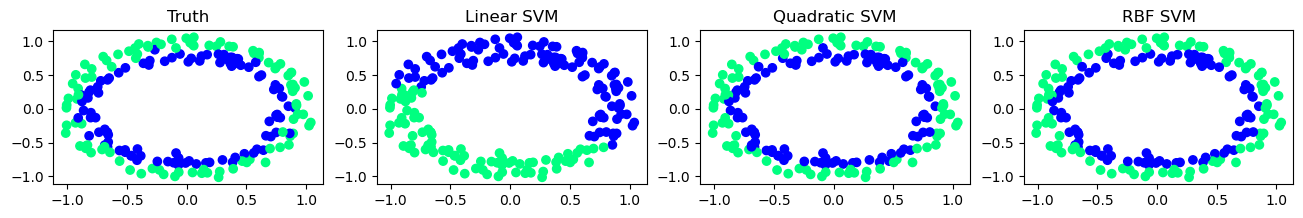

In [33]:
fig = plt.figure(figsize=plt.figaspect(0.1))
ax = fig.add_subplot(1, 4, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 4, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_linear, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Linear SVM')

ax = fig.add_subplot(1, 4, 3)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_poly, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Quadratic SVM')

ax = fig.add_subplot(1, 4, 4)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_rbf, 
           cmap=plt.get_cmap("winter_r"))
plt.title('RBF SVM')

plt.show()

## Exercise

We just saw an example where both the polynomial (of degree 2) kernel and the RBF kernel SVM worked well - where the linear SVM failed completely. In this first exercise, I want you to:

1. Replicate the example above, but using the **make_moons** instead of the **make_circles** dataset. That is, replace `from sklearn.datasets import make_circles` with `from sklearn.datasets import make_moons` and use this new function to generate $\texttt{X}$ and $\texttt{y}$. Then, check how the linear, polynomial, and radial basis function performs on this new dataset (by calculating and reporting their test accuracies).
1. The default setting for $C$, the regularization parameter, is $1$. Try to adjust this (both up and down) and see how the performance of your models changes.
1. Try to split your training data (again using **train_test_split**) to obtain a validation set. Try to tune your **polynomial** SVM (by changing the degree of the kernel and C) to obtain the best model on your validation data. Apply this model to your test data. Did you improve your model's performance on the test data?

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-svm-2-classes.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## More than 2 classes

In many classification problems, we have more than 2 classes. SVMs are **not** suitable for more than 2 classes directly.

***However***, we can just use multiple SVMs for 2 classes and solve it that way. Then we don't have to extend SVMs to more than 2 classes, but are still able to work with more than 2 classes. Fantastic!

One-versus-rest (OVR) [also called one-versus-all (OVA)]: For $k$ classes, fit $k$ SVMs, each seperating one class from the rest. Prediction is based on which of the $k$ SVMs that is "the most confident" in its prediction.

One-versus-one (OVO): For $k$ classes, fit for each class $k−1$ SVMs, one for each comparison (i.e. compare all classes one on one). Prediction is based on which class wins the most pairwise comparisons.

Which to use? Both work, but OVO is **not** feasible when there are many classes (quadratic growth versus linear growth).

**Note**: This method is extendable to all classification algorithms.

## More than 2 classes

### One-versus-rest (OVR) -> k SVMs 
- SVM 1 learns “Output==1” vs “Output != 1” 
- SVM 2 learns “Output==2” vs “Output != 2” 
- ...
- SVM k learns “Output==k” vs “Output != k” 

### One-versus-one (OVO): k(k-1)/2 SVMs
- SVM 1 learns “Output==1” vs “Output == 2” 
- SVM 2 learns “Output==1” vs “Output == 3” 
- ...
- SVM k(k-1)/2 learns “Output==k-1” vs “Output == k” 

To predict the output for a new input, just predict with each SVM and find out which one puts the prediction the furthest into the positive region (OVR) or predict the class which is most frequently assigned (OVO).

## Coding an SVM for classification of >2 classes

We will now turn to a real dataset, consisting of images of digits (8x8 pixels); that is, we turn to the field of computer vision.

For simplicitly, instead of looking at the real 8x8 image, we look at its vector representartion (vector of 8x8=64 values).

There are 10 classes (0-9), and we want our SVM to be able to predict the digit based on its image.

Note how the approach is identical to the one we used for 2 classes.

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

# Load the digits dataset
X, y = load_digits(return_X_y=True)

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


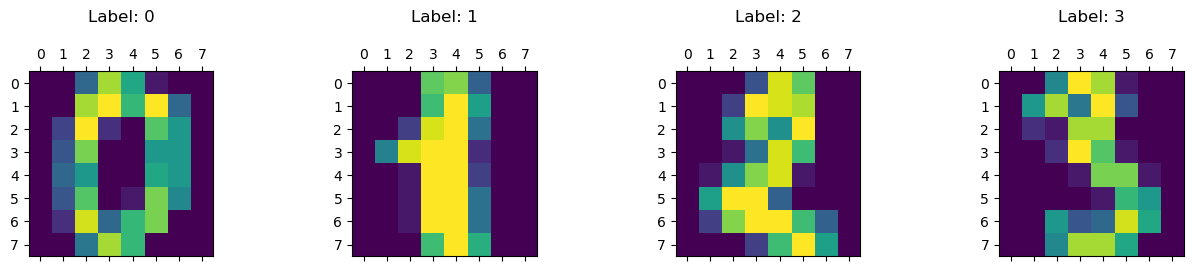

In [9]:
import matplotlib.pyplot as plt 
digits = load_digits()

fig = plt.figure(figsize=plt.figaspect(0.15))
ax = fig.add_subplot(1, 4, 1)
ax.matshow(digits.images[0])
plt.title(f'Label: {digits.target[0]}\n')
ax = fig.add_subplot(1, 4, 2)
ax.matshow(digits.images[1]) 

plt.title(f'Label: {digits.target[1]}\n')
ax = fig.add_subplot(1, 4, 3)
ax.matshow(digits.images[2]) 
plt.title(f'Label: {digits.target[2]}\n')
ax = fig.add_subplot(1, 4, 4)
ax.matshow(digits.images[3]) 

plt.title(f'Label: {digits.target[3]}\n')
plt.show()

In [10]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# ... and predicting
y_test_hat_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test_hat_linear, y_test)
print(f'Linear SVM achieved {round(accuracy_linear * 100, 1)}% accuracy.')

Linear SVM achieved 97.8% accuracy.


In [11]:
# Estimating a polynomial SVM of degree 2
svm_poly = svm.SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)

# ... and predicting
y_test_hat_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test_hat_poly, y_test)
print(f'Polynomial (of degree 2) SVM achieved {round(accuracy_poly * 100, 1)}% accuracy.')

Polynomial (of degree 2) SVM achieved 98.9% accuracy.


In [12]:
# Estimating a radial basis function SVM
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# ... and predicting
y_test_hat_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test_hat_rbf, y_test)
print(f'RBF SVM achieved {round(accuracy_rbf * 100, 1)}% accuracy.')

RBF SVM achieved 98.6% accuracy.


In [13]:
# We can also switch between OVO and OVR
# Let's do it for the RBF (default is OVR)

# Estimating a radial basis function SVM
svm_rbf_ovr = svm.SVC(kernel='rbf', decision_function_shape='ovr')
svm_rbf_ovo = svm.SVC(kernel='rbf', decision_function_shape='ovo')

# Fit them
svm_rbf_ovr.fit(X_train, y_train)
svm_rbf_ovo.fit(X_train, y_train)

# Predict for both
y_test_hat_rbf_ovr = svm_rbf_ovr.predict(X_test)
y_test_hat_rbf_ovo = svm_rbf_ovo.predict(X_test)

# And check resulults!
accuracy_rbf_ovr = accuracy_score(y_test_hat_rbf_ovr, y_test)
accuracy_rbf_ovo = accuracy_score(y_test_hat_rbf_ovo, y_test)

print(f'RBF SVM OVR achieved {round(accuracy_rbf_ovr * 100, 1)}% accuracy.')
print(f'RBF SVM OVO achieved {round(accuracy_rbf_ovo * 100, 1)}% accuracy.')

RBF SVM OVR achieved 98.6% accuracy.
RBF SVM OVO achieved 98.6% accuracy.


In [14]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
# The Iris dataset is a well-known dataset for machine learning and contains measurements of iris flowers.
# It consists of 150 samples and 4 features for each sample, making it suitable for classification tasks.

# Load the Iris dataset using scikit-learn's datasets module
iris = datasets.load_iris()
# Feature data (sepal length and width, petal length and width)
X = iris.data
# Target variable, which represents the species of the iris flowers
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [15]:
# Create a multiclass SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# Print the results
print("Accuracy:", accuracy)

Accuracy: 1.0


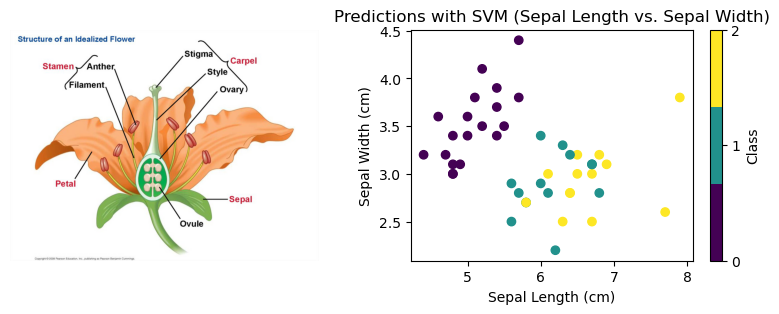

In [16]:
from IPython.display import Image, display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
img_path = './graphics/Sepal.jpg'  # Replace with the actual path to your image
img = plt.imread(img_path)
ax1.imshow(img)
ax1.axis('off')  # Hide axes for the image

scatter = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.get_cmap('viridis', 3), marker='o')
ax2.set_xlabel('Sepal Length (cm)')
ax2.set_ylabel('Sepal Width (cm)')
ax2.set_title('Predictions with SVM (Sepal Length vs. Sepal Width)')
fig.colorbar(scatter, ax=ax2, ticks=[0, 1, 2], label='Class')
plt.show()

## Exercise

All three types of kernels appear to perform quite well on the MNIST data! Nonetheless, their performance can be improved!
1. Try to split your training data (again using **train_test_split**) to obtain a validation set. Try to optimize the performance of your model on the validation data, by trying different kernels (linear, poly, and rbf), different values of C, different decision function (ovr or ovo), and perhaps even other stuff. You can find a full list of options to tune at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-svm-k-classes.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Regression (optional reading)

Somewhat surprisingly, the SVM can be extended to regression.

SVMs for regression are *somewhat* similar to ridge regression, if you imagine we enlargen the feature space by transforming our variables.

As in SVMs for classification, we use the kernel trick to handle the higher dimensionality without actually transforming the variables.

Further, instead of relying on all observations, we determine a "good enough" number ($\varepsilon$). If a predictions is sufficiently close (called within the $\varepsilon$-tube), it has no effect. The *other* observations than make up the support vectors.

<img src="./graphics/svm-regression.png" alt="Drawing" style="width: 400px;"/>
Source: "Drucker, H., Burges, C.J.C., Kaufman, L., Smola, A. and Vapnik, V. Support vector regression machines. Advances in Neural Information Processing Systems, 9:155–161, 1997."

## Coding an SVM for regression

To fit an SVM for regression, we start by initializing an SVM for regression, using $\texttt{model = svm.SVR(settings)}$. **Note the use of SVR instead of SVC!**

We then fit it on our data, using $\texttt{model.fit(Xtrain, ytrain)}$.

We can then predict on data using $\texttt{yhat = model.predict(Xtest)}$.

So the only real new thing is making sure to use SVR instead of SVC.

So let's do it - and why not use the Boston housing data from the very paper that invented SVMs for regression?

In [17]:
#from sklearn.datasets import load_boston # NOTE how we use the Boston data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # NOTE how we use a new metric!
from sklearn import svm
import pandas as pd
import numpy as np

In [18]:
#from sklearn.datasets import load_boston # NOTE how we use the Boston data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # NOTE how we use a new metric!
from sklearn import svm
import pandas as pd
import numpy as np

data = './data/HousingData.csv'
raw_df = pd.read_csv(data).dropna()

y = raw_df.values[:, 2]
X = raw_df.values[:, 3:]

#X, y = load_boston(return_X_y=True)

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(315, 11) (79, 11) (315,) (79,)


In [19]:
svm_linear = svm.SVR(kernel='linear')
svm_linear.fit(X_train, y_train)

# ... and predicting
y_test_hat_linear = svm_linear.predict(X_test)
mse_linear = mean_squared_error(y_test_hat_linear, y_test)
print(f'Linear SVM achieved {round(mse_linear, 3)} MSE.')

Linear SVM achieved 18.174 MSE.


In [20]:
svm_poly = svm.SVR(kernel='poly')
svm_poly.fit(X_train, y_train)

# ... and predicting
y_test_hat_poly = svm_poly.predict(X_test)
mse_poly = mean_squared_error(y_test_hat_poly, y_test)
print(f'Polynomial SVM achieved {round(mse_poly, 3)} MSE.')

Polynomial SVM achieved 25.802 MSE.


In [21]:
svm_rbf = svm.SVR(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# ... and predicting
y_test_hat_rbf = svm_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_test_hat_rbf, y_test)
print(f'RBF SVM achieved {round(mse_rbf, 3)} MSE.')

RBF SVM achieved 24.072 MSE.


In [22]:
# Standadizing variables to improve performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

svm_rbf = svm.SVR(kernel='rbf')
svm_rbf.fit(Z_train, y_train)

# ... and predicting
y_test_hat_rbf = svm_rbf.predict(Z_test)
mse_rbf = mean_squared_error(y_test_hat_rbf, y_test)
print(f'RBF SVM achieved {round(mse_rbf, 3)} MSE.')

RBF SVM achieved 12.779 MSE.


In [23]:
# Let's tune epsilon as well (remember it controls the tube size)
# Default is 0.1

svm_rbf_low_epsilon = svm.SVR(kernel='rbf', epsilon=0.01)
svm_rbf_high_epsilon = svm.SVR(kernel='rbf', epsilon=1)

svm_rbf_low_epsilon.fit(Z_train, y_train)
svm_rbf_high_epsilon.fit(Z_train, y_train)

# ... and predicting
y_test_hat_rbf_low_epsilon = svm_rbf_low_epsilon.predict(Z_test)
y_test_hat_rbf_high_epsilon = svm_rbf_high_epsilon.predict(Z_test)

mse_rbf_low_epsilon = mean_squared_error(y_test_hat_rbf_low_epsilon, y_test)
mse_rbf_high_epsilon = mean_squared_error(y_test_hat_rbf_high_epsilon, y_test)

print(f'RBF SVM with low epsilon achieved {round(mse_rbf_low_epsilon, 3)} MSE.')
print(f'RBF SVM with high epsilon achieved {round(mse_rbf_high_epsilon, 3)} MSE.')

RBF SVM with low epsilon achieved 12.745 MSE.
RBF SVM with high epsilon achieved 12.436 MSE.


## Exercise

Surprisingly (at least to me), the linear SVM is far better than either the polynomial or the RBF SVM without standardization. How come?

An important part for this exercise in particular is regularization ($C$) and standadization (using $\texttt{sklearn}$'s $\texttt{StandardScaler}$; see prior slide).

1. Standardize the data and implement a linear, polynomial, and RBF SVM. What is the performance (MSE) of each model now? Is the linear model still best?
1. Try to split your training data (again using **train_test_split**) to obtain a validation set. Try to optimize the performance of your model on the validation data, focusing particularly on regularization ($C$). Can you achieve test MSE below 10 (this is not trivial!)? In the original paper, they achieve an MSE of 7.2 (although it is not directly comparable). Remember to use standadization!

**Note**: Large values of $C$ may be VERY slow to fit (only for some of the models)! Try not to go too extreme, as your code may crash.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-svm-regression.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Advantages and disadvantages of SVMs

Advantages

1. Easy to use with few parameters that need tuning.
1. Able to model high dimensional space quite effeciently, using ***the kernel trick***. This is sometimes of great important (remember circles example)!

Disadvantages

1. Does not work (without applying various tricks) for large datasets (>100k observations), as the method is very slow as the data size increases.
1. Somewhat "outdated". Often neural networks (for large datasets) or boosting methods (for small datasets) outperform SVMs.
1. No feature importance measures (all features are always included)
1. Do not provide classification probabilities/confidence

## Summary and looking ahead

Today we:

1. Learned what an SVM is and how they can be used for classification and regression.
1. Used SVM to solve classification (and regression) problems using Python.
1. Learned to prepare data to improve performance (by standardization).
1. Learned to optimize the parameters of SVMS.

Great! What's next?

We'll move on to decision trees and ensembling and boosting. If everything goes as planned, this will take two weeks. Check the lecture plan to prepare for next week.